In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

# Suppress specific FutureWarnings related to seaborn
warnings.filterwarnings("ignore", category=FutureWarning, message="is_categorical_dtype is deprecated")
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

In [2]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Preprocess and merge data
data = pd.merge(transactions, customers, on='CustomerID')

In [3]:
# Feature Engineering
customer_profile = data.groupby('CustomerID').agg({'ProductID': lambda x: list(x),
                                                   'Quantity': 'sum',
                                                   'TotalValue': 'sum',
                                                   'TransactionDate': ['min', 'max'],}).reset_index()


customer_profile.columns = ['_'.join(col).strip() for col in customer_profile.columns.values]
customer_profile = customer_profile.rename(columns={'ProductID_': 'Products_Purchased',
                                                    'Quantity_sum': 'Total_Quantity',
                                                    'TotalValue_sum': 'Total_Spend',
                                                    'TransactionDate_min': 'First_Transaction',    
                                                    'TransactionDate_max': 'Last_Transaction'})

# Normalize numerical features
scaler = StandardScaler()
customer_profile[['Total_Quantity', 'Total_Spend']] = scaler.fit_transform(customer_profile[['Total_Quantity', 'Total_Spend']])


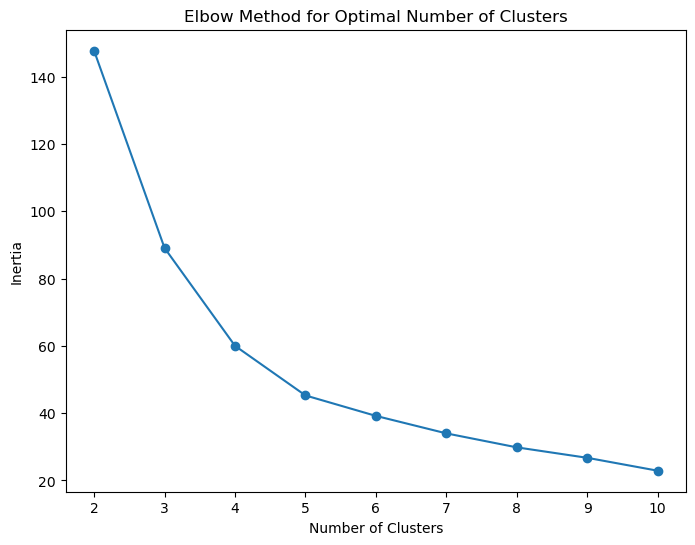

In [4]:
# Select the features for clustering
features = customer_profile[['Total_Quantity', 'Total_Spend']]

# Compute inertia for a range of k (2 to 10)
inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting inertia to identify the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



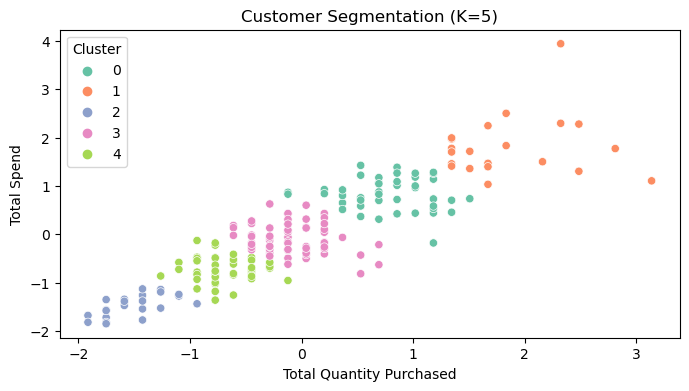

In [5]:
# Choose the optimal number of clusters ( from elbow plot)
optimal_clusters =5

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  
customer_profile['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Total_Quantity', y='Total_Spend', hue='Cluster', data=customer_profile, palette='Set2')
plt.title(f'Customer Segmentation (K={optimal_clusters})')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.show()


In [6]:
# Select features for clustering (excluding CustomerID)
X = customer_profile[['Total_Quantity', 'Total_Spend']].values

In [7]:
import warnings

# Suppress specific FutureWarnings and UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message="The default value of `n_init` will change")
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak")


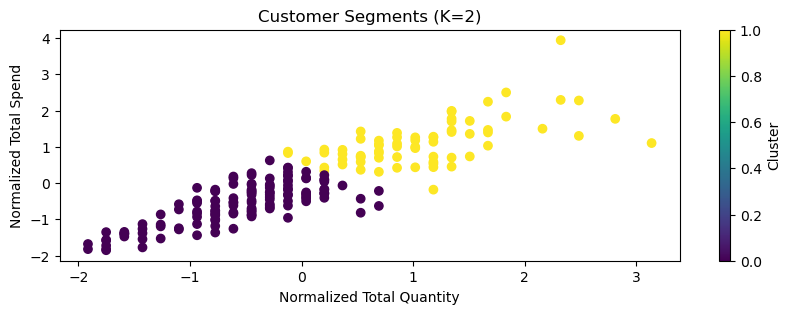

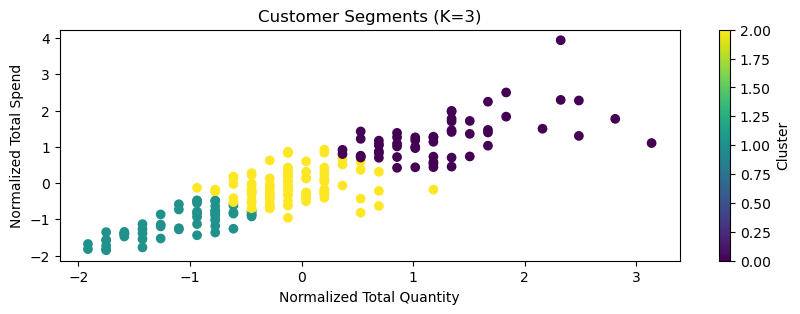

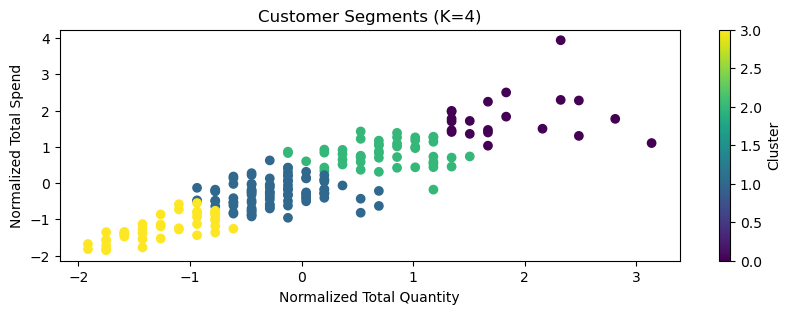

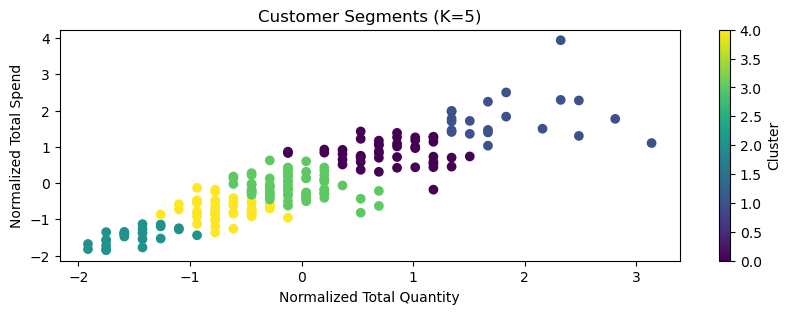

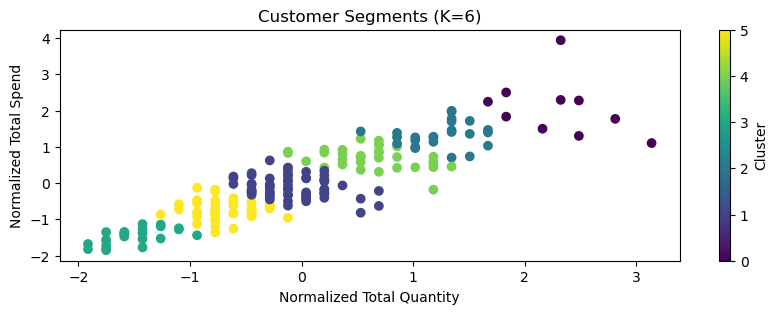

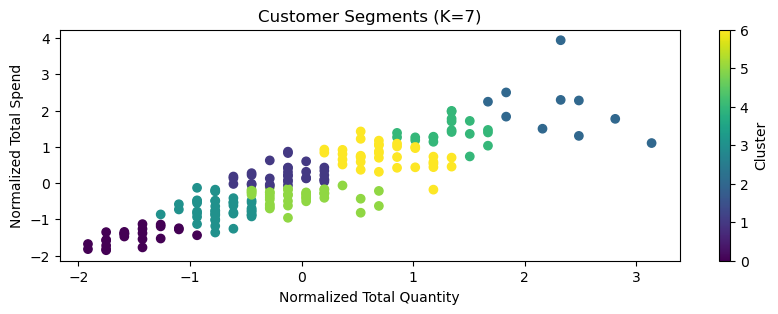

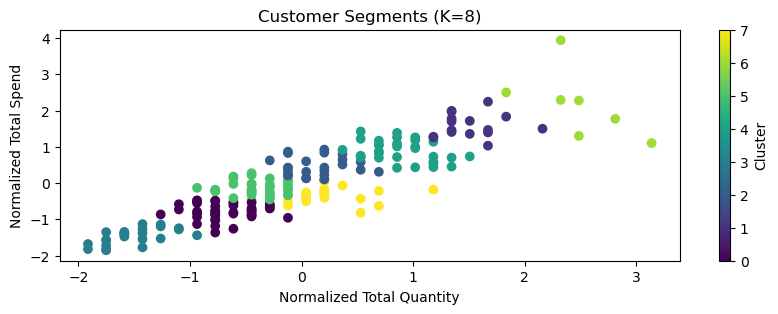

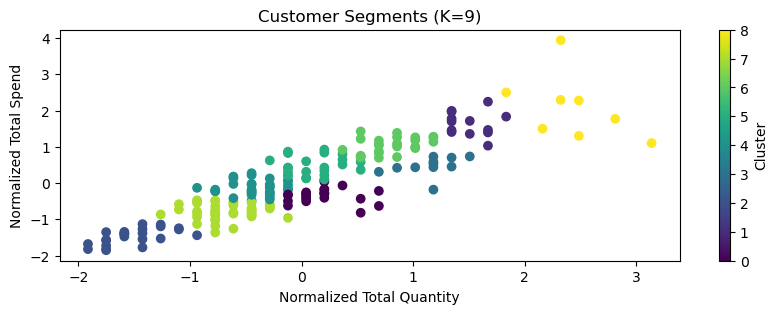

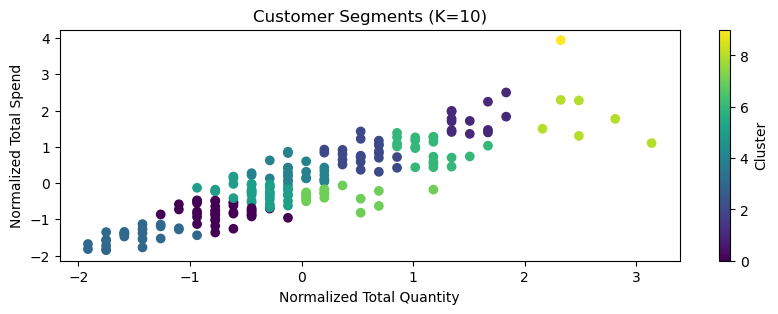

,Number of Clusters,DB Index,Silhouette Score
0,2,0.629207,0.548496
1,3,0.701715,0.451024
2,4,0.721280,0.449750
3,5,0.752946,0.430928
4,6,0.822510,0.393393
5,7,0.880858,0.371428
6,8,0.831303,0.380060
7,9,0.835906,0.388759
8,10,0.803058,0.370848


In [8]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

db_index_values = []
silhouette_scores = []

# Experiment with different cluster numbers (2 to 10)
for n_clusters in range(2, 11):
    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customer_profile['Cluster'] = kmeans.fit_predict(X)
    
    # Calculate DB Index 
    db_index = davies_bouldin_score(X, customer_profile['Cluster'])
    db_index_values.append(db_index)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, customer_profile['Cluster'])
    silhouette_scores.append(silhouette_avg)
    
    # Visualize clusters
    plt.figure(figsize=(10, 3))
    plt.scatter(X[:, 0], X[:, 1], c=customer_profile['Cluster'], cmap='viridis')
    plt.title(f'Customer Segments (K={n_clusters})')
    plt.xlabel('Normalized Total Quantity')
    plt.ylabel('Normalized Total Spend')
    plt.colorbar(label='Cluster')
    plt.show()

# Display DB Index and Silhouette Scores for each number of clusters
cluster_metrics = pd.DataFrame({'Number of Clusters': range(2, 11),
                                'DB Index': db_index_values,
                                'Silhouette Score': silhouette_scores})

cluster_metrics


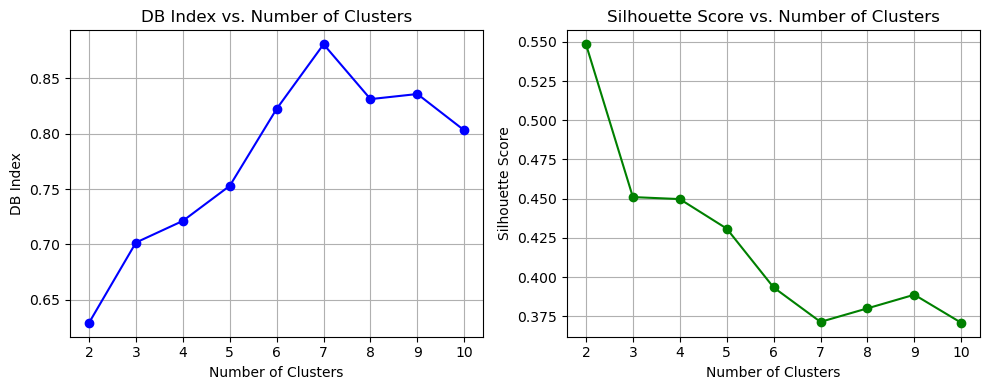

In [9]:
# Plot Silhouette Score and DB Index against number of clusters
plt.figure(figsize=(10, 4))

# Plot DB Index
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), db_index_values, marker='o', color='b', label='DB Index')
plt.title('DB Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.xticks(range(2, 11))
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='g', label='Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)

plt.tight_layout()
plt.show()


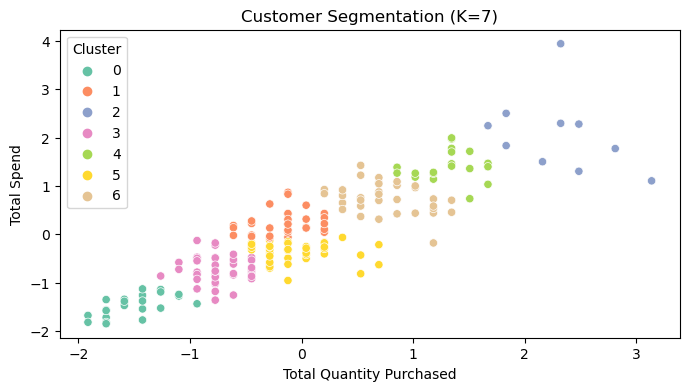

In [10]:

# Choose the optimal number of clusters 
optimal_clusters =7

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # Explicitly setting n_init=10
customer_profile['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Total_Quantity', y='Total_Spend', hue='Cluster', data=customer_profile, palette='Set2')
plt.title(f'Customer Segmentation (K={optimal_clusters})')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.show()